<a href="https://colab.research.google.com/github/hitanshi08/codsoft/blob/main/IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder
%matplotlib inline

LOADING THE DATASET

In [4]:
columns = ['Sepal length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
df = pd.read_csv('/content/IRIS.csv', names=columns , header=0)
df.head()


,Sepal length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:

# Handle missing values or invalid data in the 'Species' column
df = df.dropna(subset=['Species'])

VISUALISATION OF OUR DATASET

In [6]:
df.describe()

,Sepal length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Separate numerical columns
numerical_columns = ['Sepal length', 'Sepal Width', 'Petal Length', 'Petal Width']

In [8]:
# Convert 'Species' column to numerical values using LabelEncoder
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])


In [9]:
# Create a DataFrame with encoded species data
species_encoded = pd.get_dummies(df['Species'], prefix='Species', drop_first=True)
df = pd.concat([df, species_encoded], axis=1)


In [10]:
# Drop the original 'Species' column
df.drop('Species', axis=1, inplace=True)

In [11]:
# Combine numerical columns and encoded species columns
all_columns = numerical_columns + list(species_encoded.columns)


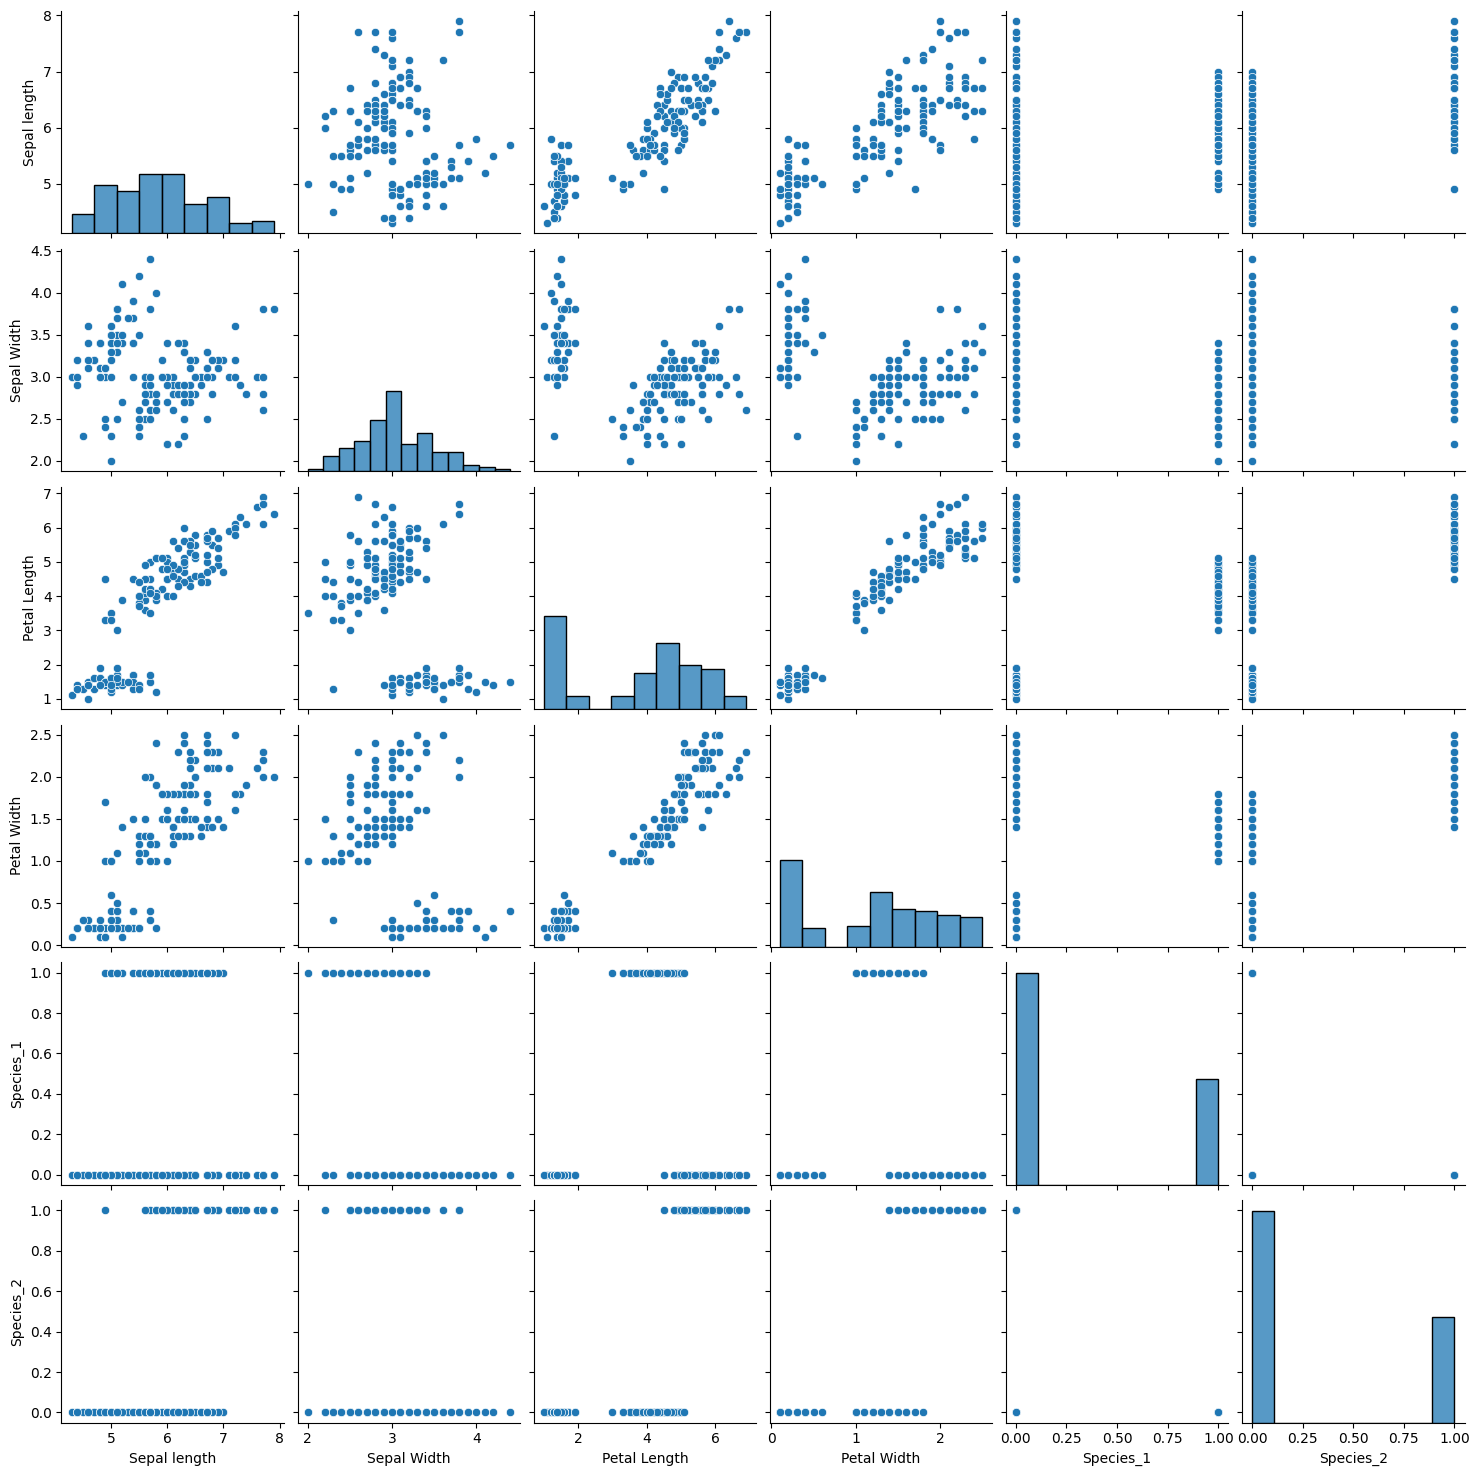

In [12]:
# Create pair plot using all numerical and encoded species columns
sns.pairplot(df, vars=all_columns)
plt.show()

Separating Input & Output Column

In [13]:
# Separate features and targets
data = df.values
x = data[:, 0:4]
y = data[:, 4].astype(int)  # Convert the target labels to integers


Splitting The Data Into TRAINING & TESTING

In [14]:
#Split the data to train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train)

[[5.  3.5 1.6 0.6]
 [6.3 2.5 4.9 1.5]
 [6.5 3.  5.5 1.8]
 [5.8 2.7 3.9 1.2]
 [4.8 3.4 1.9 0.2]
 [4.6 3.2 1.4 0.2]
 [6.9 3.1 5.4 2.1]
 [6.5 2.8 4.6 1.5]
 [6.4 2.8 5.6 2.1]
 [5.6 3.  4.1 1.3]
 [6.2 2.9 4.3 1.3]
 [6.8 3.2 5.9 2.3]
 [7.9 3.8 6.4 2. ]
 [4.8 3.  1.4 0.3]
 [7.3 2.9 6.3 1.8]
 [5.  3.5 1.3 0.3]
 [5.5 3.5 1.3 0.2]
 [6.7 3.1 4.7 1.5]
 [5.4 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.3 3.4 5.6 2.4]
 [5.1 3.8 1.6 0.2]
 [6.5 3.  5.2 2. ]
 [5.4 3.9 1.3 0.4]
 [6.1 2.9 4.7 1.4]
 [6.2 3.4 5.4 2.3]
 [5.7 2.8 4.1 1.3]
 [4.8 3.4 1.6 0.2]
 [5.8 2.6 4.  1.2]
 [7.7 3.8 6.7 2.2]
 [7.1 3.  5.9 2.1]
 [6.6 3.  4.4 1.4]
 [7.7 2.8 6.7 2. ]
 [5.7 2.6 3.5 1. ]
 [5.5 2.4 3.8 1.1]
 [5.7 2.9 4.2 1.3]
 [5.7 3.  4.2 1.2]
 [5.9 3.2 4.8 1.8]
 [5.5 2.6 4.4 1.2]
 [4.8 3.  1.4 0.1]
 [5.9 3.  4.2 1.5]
 [6.  3.  4.8 1.8]
 [6.4 2.8 5.6 2.2]
 [6.3 2.7 4.9 1.8]
 [5.8 2.7 5.1 1.9]
 [5.5 2.5 4.  1.3]
 [6.3 3.3 6.  2.5]
 [5.1 3.8 1.9 0.4]
 [4.4 3.2 1.3 0.2]
 [5.4 3.4 1.7 0.2]
 [6.4 3.2 5.3 2.3]
 [6.9 3.2 5.7 2.3]
 [7.2 3.2 6.

MODEL 1: Support vector machine algorithm

In [15]:
from sklearn.svm import SVC
# Create the SVC model and fit it to the training data
model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [16]:
prediction1 = model_svc.predict(x_test)
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction1))
for i in range(len(prediction1)):
  print(y_test[i],prediction1[i])

0.8666666666666667
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 1
1 1
0 0
1 1
1 1
0 0
0 0
0 0
1 1
1 0
0 1
1 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1


LOGISTIC REGRESSION

In [17]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(x_train , y_train)

LogisticRegression()

In [18]:
prediction2 = model_svc.predict(x_test)
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction2)*100)
for i in range(len(prediction2)):
  print(y_test[i],prediction2[i])

86.66666666666667
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 1
1 1
0 0
1 1
1 1
0 0
0 0
0 0
1 1
1 0
0 1
1 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1


MODEL3:DECISION TREE CLASSIFIER

In [19]:
from sklearn.tree import DecisionTreeClassifier
model_DTC=DecisionTreeClassifier()
model_DTC.fit(x_train,y_train)


DecisionTreeClassifier()

In [20]:
prediction3 = model_svc.predict(x_test)
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction3))
for i in range(len(prediction3)):
  print(y_test[i],prediction3[i])

0.8666666666666667
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 1
1 1
0 0
1 1
1 1
0 0
0 0
0 0
1 1
1 0
0 1
1 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1


In [21]:
#A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30



In [22]:
x_new = np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1],[5.3,2.5,4.6,1.9]])
#prediction of the species from input vector
prediction = model_svc.predict(x_new)
print("Prediction Of Species: {}".format(prediction))

Prediction Of Species: [0 1 1]
